In [7]:
#Input reservoir parameters
Dh = float(input("Enter the Hydrolyc Diffussivity constanst: "))  
A = float(input("Enter the area parameter: "))
k = float(input("Enter the permeability: "))
um = float(input("Enter the oil viscosity: "))
#Input constant flow rate
Q = float(input("Enter the injection flow rate: "))
#Input space step
del_x = float(input("Enter the space step: "))
#Input time step
del_t = float(input("Enter the time step: "))
#Input no of space steps
xn = int(input("Enter the number of space steps:"))
#Input no of time steps
tn = int(input("Enter the number of time steps:"))

from sympy import var
from sympy import sympify
import numpy as np
x = var('x')  # the possible variable names must be known beforehand...
user_input = input("Enter the pressure distrition function wrt space in x direction.")
expr = sympify(user_input)

P = np.ones((tn,xn))


for i in range(1,xn+1):
  P[0][i-1] =expr.subs(x,i*(del_x/2))

ap0 =(A*del_x)/del_t
awe = Dh/del_x
ap = 2*awe + ap0

for j in range(0,tn-1):
  eq = np.ones(xn+1)
  eq[1] = -awe/ap
  eq[2] = ap - (awe**2)/ap
  for i in range(3,xn+1):
    eq[i] = ap - (awe**2)/eq[i-1]
  
  

  eqc = np.ones(xn)
  for i in range(xn):
    if(i==0):
      eqc[i] = ((Dh*-1*Q*um)/(k*A)) + ap0*P[j][i]
    else:
      eqc[i] = ap0*P[j][i]
  
  eqc[0] = eqc[0]/ap
  eqc[1] += eqc[0]*awe
  for i in range(2,xn):
    eqc[i] += awe*(eqc[i-1]/eq[i])
  

 
  P[j+1][xn-1] = eqc[xn-1]/eq[xn]
  for i in range(xn-2,-1,-1):
    if(i==0):
      P[j+1][i] = (eqc[i] + P[j+1][1]*(awe/ap))
    else:
      P[j+1][i] = (eqc[i]+P[j+1][i+1]*awe)/eq[i+1]
  print(P[j+1][i])


ValueError: could not convert string to float: '3d'

In [1]:
#INITIALISING parameters

#Input reservoir parameters
Dh = float(input("Enter the Hydrolyc Diffussivity constanst: "))  

A = float(input("Enter the area parameter: in inch2"))

k = float(input("Enter the permeability: "))

um = float(input("Enter the oil viscosity: "))

#Input constant flow rate
Q = float(input("Enter the injection flow rate: "))

#Input space step
del_x = float(input("Enter the space step: "))

#Input time step
del_t = float(input("Enter the time step: "))

#Input no of space steps
xn = int(input("Enter the number of space steps:"))

#Input no of time steps
tn = int(input("Enter the number of time steps:"))

In [2]:
Dh = 0.49345
A = 7.49 #m2
k = 9.869e-14 #m2
um = 1e-3 #Pas
Q=5.521e-4 #m3/s
del_x = 0.1 #m
del_t = 1 #s
xn = 1000 #m
tn = 180 #s

In [4]:
#INITIALISING Pressure initial equation // Pinitial = P(t=0,x)
from sympy import var
from sympy import sympify
import numpy as np
x = var('x')  # the possible variable names must be known beforehand...
user_input = input("Enter the pressure distrition function wrt space in x direction.")
expr = sympify(user_input) #P[0] = 27586206.9Pa

In [5]:
#INITIALISING A Numpy Array for Pressure of oil in space and time
P = np.ones((tn,xn))

In [6]:
#INITIALISING P(0,x) #27586206.9
for i in range(0,xn):
  print()
  P[0][i] =expr.subs(x,i*(del_x)+(del_x)/2)
print(P[0])

In [7]:
#INITIALISING ap0,awe and ap
ap0 =(A*del_x)/del_t
awe = Dh/del_x
ap = 2*awe + ap0

In [8]:
#Solving Pressure discretised equations with Thomson algorithm
#We have avoided any computations steps involving zero elements in coeffient matrix.


for j in range(0,tn-1):
  eq = np.ones(xn+1)
  eq[1] = -awe/ap
  eq[2] = ap - (awe**2)/ap
  for i in range(3,xn+1):
    eq[i] = ap - (awe**2)/eq[i-1]


  eqc = np.ones(xn)
  for i in range(xn):
    if(i==0):
      eqc[i] = ((Dh*-1*Q*um)/(k*A)) + ap0*P[j][i]
    else:
      eqc[i] = ap0*P[j][i]
  
  eqc[0] = eqc[0]/ap
  eqc[1] += eqc[0]*awe
  for i in range(2,xn):
    eqc[i] += awe*(eqc[i-1]/eq[i])

#Solving equations
  P[j+1][xn-1] = eqc[xn-1]/eq[xn]
  for i in range(xn-2,-1,-1):
    if(i==0):
      P[j+1][i] = (eqc[i] + P[j+1][1]*(awe/ap))
    else:
      P[j+1][i] = (eqc[i]+P[j+1][i+1]*awe)/eq[i+1]
print(P)

[[27586206.9        27586206.9        27586206.9        ...
  27586206.9        27586206.9        27586206.9       ]
 [ 8805271.25972844 14834503.86971996 18928175.51716619 ...
  18951553.96519864 14868936.06491965  8855983.6108915 ]
 [ 5214241.95223736  9958097.26471907 13961770.48232882 ...
  13998559.23541577 10005696.75088356  5274650.8138814 ]
 ...
 [  383264.51210248   841021.06054734  1298381.82959666 ...
   1369364.31107776   913238.50925119   456717.99671406]
 [  381970.99502214   838435.70433011  1294507.98648098 ...
   1365500.92812745   910660.13402229   455427.97239328]
 [  380688.37718766   835872.12304055  1290666.74691839 ...
   1361670.06069399   908103.47492431   454148.81788817]]


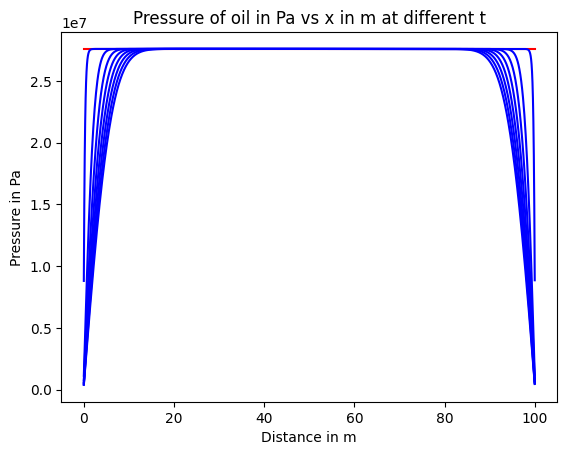

In [10]:
import matplotlib.pyplot as plt
x = np.arange(0.05,100.05,0.1)
plt.title("Pressure of oil in Pa vs x in m at different t")
plt.ylabel("Pressure in Pa")
plt.xlabel("Distance in m")

plt.plot(x,P[0],'r')
for i in range(1,180,25):
    plt.plot(x,P[i],'b')
plt.show()